In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/delhiaqi.csv")
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()

In [5]:
desc_stats = df.describe()

In [7]:
desc_stats

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,hour,day,month
count,561,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.0
mean,2023-01-12 16:00:00,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062,11.379679,12.192513,1.0
min,2023-01-01 00:00:00,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000,0.000000,1.000000,1.0
25%,2023-01-06 20:00:00,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000,5.000000,6.000000,1.0
50%,2023-01-12 16:00:00,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000,11.000000,12.000000,1.0
75%,2023-01-18 12:00:00,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000,17.000000,18.000000,1.0
max,2023-01-24 08:00:00,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000,23.000000,24.000000,1.0
std,NaN,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094,6.944696,6.756374,0.0


In [6]:
correlation_matrix = df.drop(columns='date').corr(numeric_only=True)

In [8]:
correlation_matrix

,co,no,no2,o3,so2,pm2_5,pm10,nh3,hour,day,month
co,1.000000,0.969740,0.776402,-0.463082,0.716831,0.953083,0.966801,0.826299,0.191138,-0.196306,NaN
no,0.969740,1.000000,0.702201,-0.377813,0.734503,0.888810,0.903339,0.823638,0.135450,-0.131474,NaN
no2,0.776402,0.702201,1.000000,-0.407177,0.734961,0.698696,0.720050,0.700254,0.139751,-0.162382,NaN
o3,-0.463082,-0.377813,-0.407177,1.000000,-0.049158,-0.450458,-0.468477,-0.299663,-0.147007,0.051575,NaN
so2,0.716831,0.734503,0.734961,-0.049158,1.000000,0.648996,0.658325,0.843635,0.016675,-0.070568,NaN
pm2_5,0.953083,0.888810,0.698696,-0.450458,0.648996,1.000000,0.994088,0.720303,0.191102,-0.265522,NaN
pm10,0.966801,0.903339,0.720050,-0.468477,0.658325,0.994088,1.000000,0.754468,0.206265,-0.229061,NaN
nh3,0.826299,0.823638,0.700254,-0.299663,0.843635,0.720303,0.754468,1.000000,0.167693,-0.043720,NaN
hour,0.191138,0.135450,0.139751,-0.147007,0.016675,0.191102,0.206265,0.167693,1.000000,-0.030332,NaN
day,-0.196306,-0.131474,-0.162382,0.051575,-0.070568,-0.265522,-0.229061,-0.043720,-0.030332,1.000000,NaN


In [11]:
#correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Pollutants in Delhi")
plt.tight_layout()
plt.savefig("aqi_correlation_heatmap.png")
plt.close()

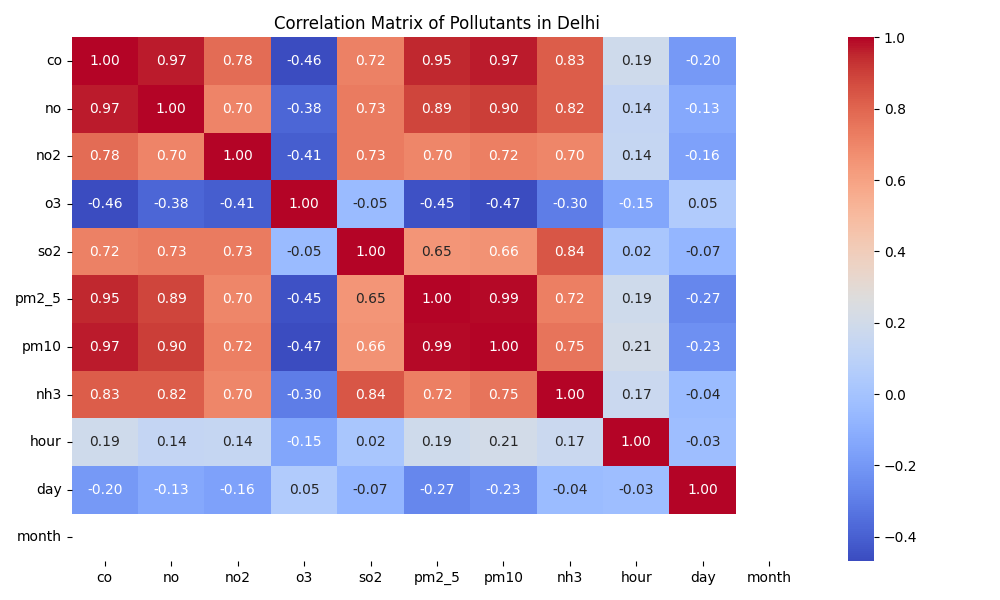

In [12]:
from IPython.display import Image, display
display(Image("aqi_correlation_heatmap.png"))

**Redder shades** = Strong positive correlation
**Bluer shades** = Strong negative correlation


**Strong Positive Correlations:**

*CO, NO, PM2.5, PM10 are very strongly correlated with each other (values between 0.95 - 0.99).*
Suggests that they often originate from the same sources, such as vehicular emissions and industrial pollution.

*SO2 is strongly correlated with NH3, CO, and PM10*.
Indicates combined emissions possibly from combustion and fertilizer-related activities.

**Strong Negative Correlations:**

*O₃ (ozone) shows a strong negative correlation with CO, PM2.5, PM10, and NO.*
Ozone is often formed secondarily in sunlight and is inversely related to direct emissions like CO and NO.

In [19]:
df['week'] = df['date'].dt.isocalendar().week
weekly_avg = df.groupby('week')[['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'nh3']].mean()
display(weekly_avg)

,pm2_5,pm10,no2,so2,co,o3,nh3
week,,,,,,,
1,406.534762,471.023631,80.098512,60.376667,4190.683333,27.353452,21.519286
2,369.237321,418.176310,70.252083,63.132440,3649.632381,35.886012,24.094167
3,285.133512,349.163631,74.195179,65.884226,3262.321369,28.827024,27.900060
4,366.518788,463.286364,69.022121,60.595455,4019.390606,28.226667,28.800303
52,443.940000,535.040417,93.236250,102.260417,5929.152500,21.290833,63.490833


In [20]:
plt.figure(figsize=(12, 6))
for pollutant in weekly_avg.columns:
    plt.plot(weekly_avg.index, weekly_avg[pollutant], label=pollutant)
plt.title("Weekly Average of Pollutants in Delhi")
plt.xlabel("Week")
plt.ylabel("Concentration (μg/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("weekly_avg_pollutants.png")
plt.close()

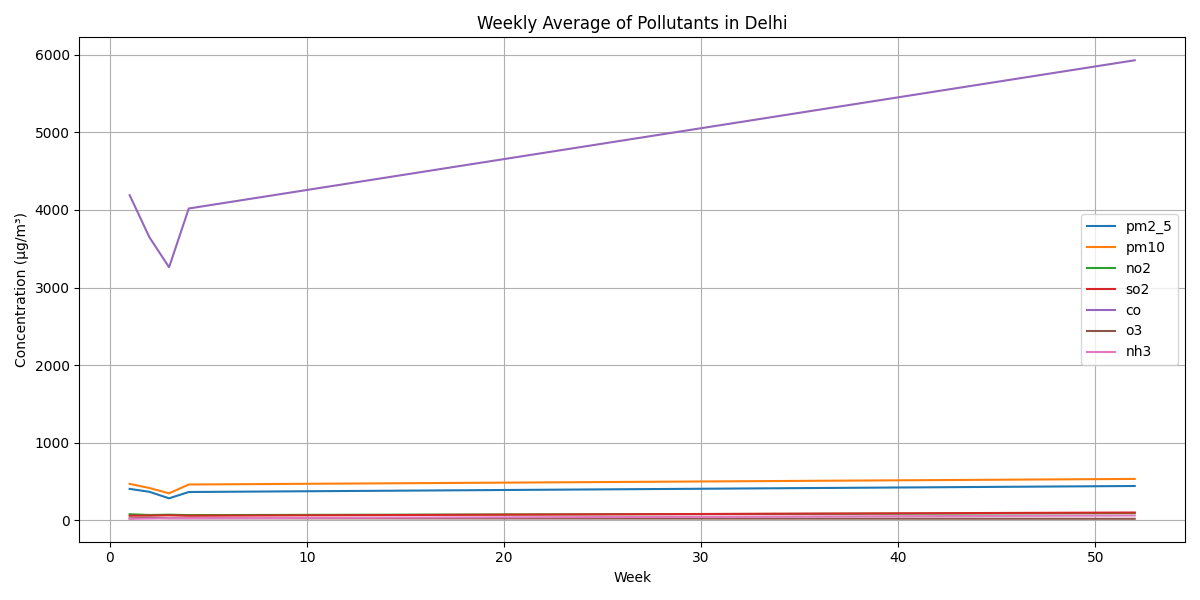

In [21]:
from IPython.display import Image, display
display(Image("weekly_avg_pollutants.png"))

**🟠 PM10 & 🔵 PM2.5 (Particulate Matter):**

These dominate the graph among all pollutants.
Their levels start high (week 1), dip slightly, and then stabilize or increase slightly as weeks progress.
Consistently high values indicate that airborne particles are a persistent problem in Delhi.

**🟣 NH₃ (Ammonia):**

Shows an unusual sharp drop in the early weeks (week 1–4) and a steady increase afterward.
Its values are disproportionately high, which might indicate:
A data anomaly or error, or
Significant agricultural or waste-related ammonia emissions increasing through the year.

**🔴 SO₂, 🟢 NO₂, ⚫ CO, and 🟤 O₃:**

These remain relatively low and stable compared to PM2.5 and PM10.
Small fluctuations week to week but no sharp peaks.
O₃ (ozone) generally stays lowest, which is expected due to its photochemical nature (increases in summer sunlight).

In [22]:
hourly_avg = df.groupby('hour')[['pm2_5', 'pm10']].mean()


In [23]:
hourly_avg

,pm2_5,pm10
hour,,
0,284.571250,314.638750
1,295.627083,328.781250
2,336.278750,382.432917
3,362.630417,416.650000
4,334.481667,386.673333
5,332.568750,388.529583
6,332.872500,388.692083
7,216.307917,245.275417
8,194.313750,218.862083


In [24]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_avg)
plt.title("Hourly Variation of PM2.5 and PM10")
plt.xlabel("Hour of the Day")
plt.ylabel("Concentration (μg/m³)")
plt.grid(True)
plt.tight_layout()
plt.savefig("hourly_pm_variation.png")
plt.close()

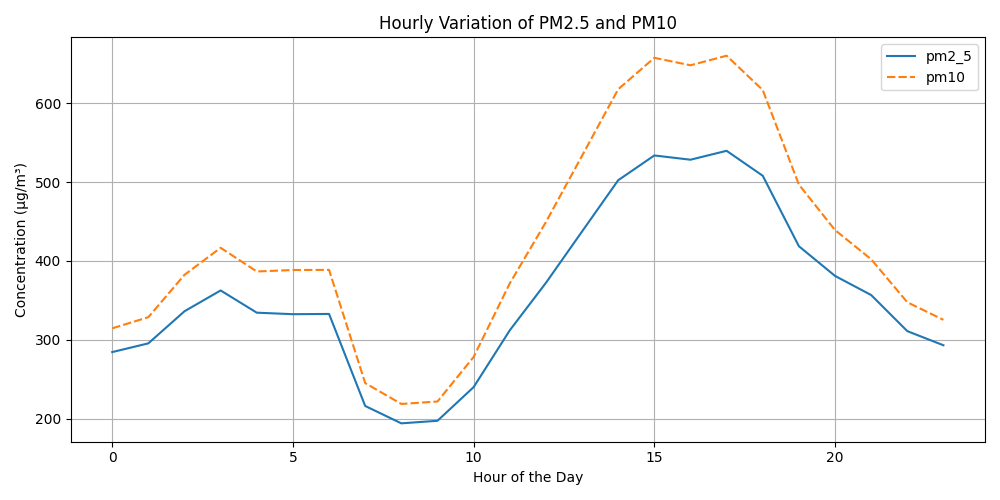

In [25]:
from IPython.display import Image, display
display(Image("hourly_pm_variation.png"))

<Figure size 1000x600 with 0 Axes>

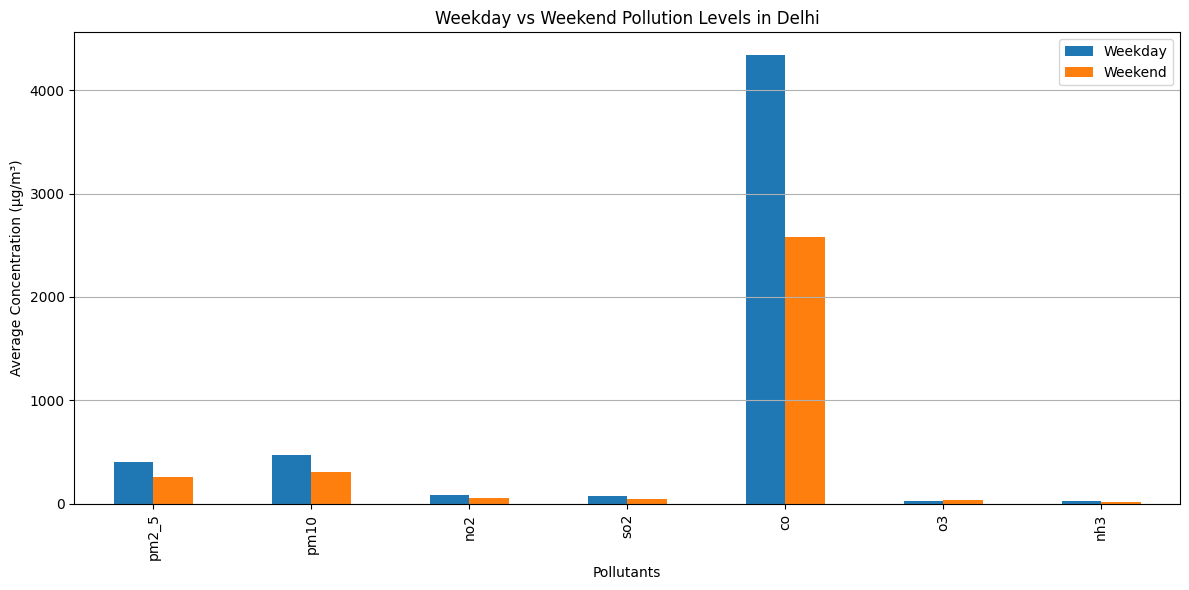

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add 'weekday' and 'is_weekend' columns
df['date'] = pd.to_datetime(df['date'])
df['weekday'] = df['date'].dt.day_name()
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])

# Compute average pollutant levels for weekdays vs weekends
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'nh3']
weekday_vs_weekend_avg = df.groupby('is_weekend')[pollutants].mean().T
weekday_vs_weekend_avg.columns = ['Weekday', 'Weekend']

# Plot comparison
plt.figure(figsize=(10, 6))
weekday_vs_weekend_avg.plot(kind='bar', figsize=(12, 6))
plt.title("Weekday vs Weekend Pollution Levels in Delhi")
plt.ylabel("Average Concentration (μg/m³)")
plt.xlabel("Pollutants")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [30]:
# Identify peak pollution hours for PM2.5 and PM10
peak_pm2_5_hour = hourly_avg['pm2_5'].idxmax()
peak_pm10_hour = hourly_avg['pm10'].idxmax()

print(f"Peak PM2.5 concentration hour: {peak_pm2_5_hour}:00")
print(f"Peak PM10 concentration hour: {peak_pm10_hour}:00")

Peak PM2.5 concentration hour: 17:00
Peak PM10 concentration hour: 17:00
